In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../')

In [3]:
import my_secrets
import quandl
df = quandl.get('WIKI/MSFT', 
           start_date="2014-01-01",
           end_date="2018-01-01", 
           api_key=my_secrets.quandl_api_key)
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2014-01-02,37.350,37.40,37.10,37.16,30632200.0,0.0,1.0,33.704254,33.749373,33.478656,33.532800,30632200.0
2014-01-03,37.200,37.22,36.60,36.91,31134800.0,0.0,1.0,33.568895,33.586943,33.027461,33.307202,31134800.0
2014-01-06,36.850,36.89,36.11,36.13,43603700.0,0.0,1.0,33.253059,33.289154,32.585290,32.603338,43603700.0
2014-01-07,36.325,36.49,36.21,36.41,35802800.0,0.0,1.0,32.779304,32.928198,32.675529,32.856007,35802800.0
2014-01-08,36.000,36.14,35.58,35.76,59971700.0,0.0,1.0,32.486028,32.612362,32.107024,32.269454,59971700.0


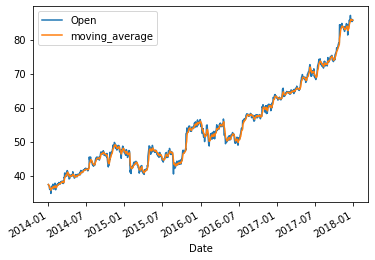

In [4]:
(
    df["Open"]
    .to_frame()
    .assign(moving_average=lambda df: df["Open"].ewm(alpha=0.3).mean())
    .plot()
);

In [18]:
open_prices = (
    quandl.get('WIKI/MSFT', 
                start_date="2017-01-01",
                end_date="2018-01-01", 
                api_key=my_secrets.quandl_api_key)
    ['Open']
)

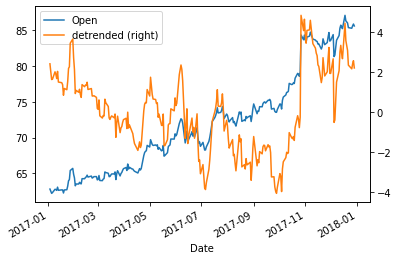

In [32]:
from utils import detrend

(
    open_prices
    .to_frame()
    .assign(detrended=lambda df: detrend(df["Open"]))
    .plot(secondary_y="detrended")
);

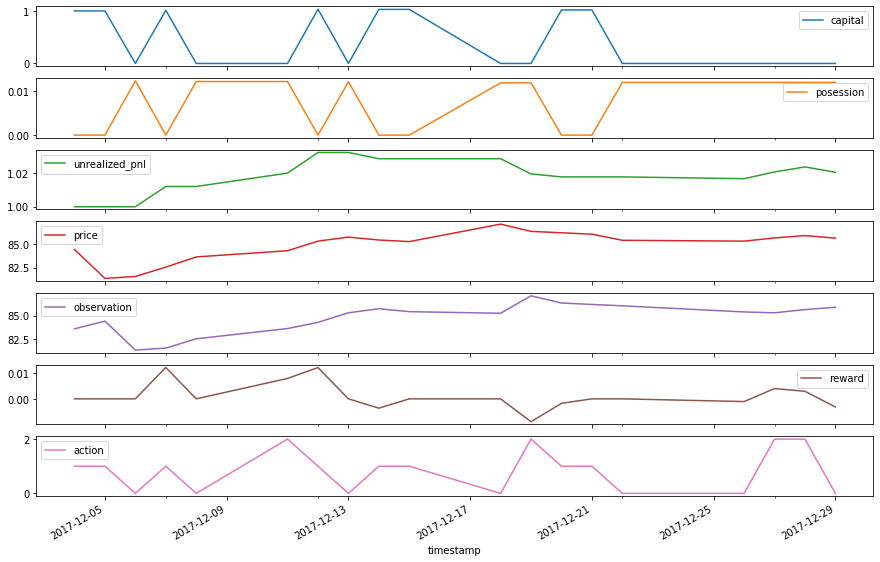

In [6]:
from buy_sell_hold import BuySellHold
from utils import run_sample_episode, episode_df

env = BuySellHold(config={'price_series': open_prices})
observations, rewards, actions, infos = run_sample_episode(env)

ep_df = episode_df(observations, rewards, actions, infos)

(
    ep_df
    .plot(subplots=True, figsize=(15, 10))
);

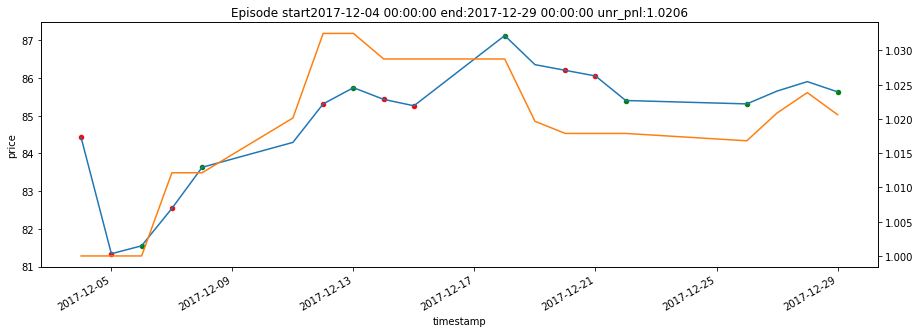

In [7]:
from plotting import plot_episode

plot_episode(ep_df)